# **코딩에서의 최단거리**

한 노드에서 다른 노드로 가는 엣지에 cost가 있는 그래프가 주어졌을 때, 한지점 > 목표지점 or 모든 지점 > 모든 지점 까지의 cost가 가장 적게 드는 최단 경로를 찾는 문제제

대표적 알고리즘으로 Dijkstra, Floyd-Warshall, Bellman-Ford등 이있다.

# **Dijkstra**

한 노드에서 다른 모든 노드까지의 최단 거리를 구하는 최단 경로 알고리즘으로 그리디 알고리즘을 사용.

cost(거리)는 반드시 음수가 없어야함. 이러한 특성으로 GPS길찾기 등에 응용됨

기본 다익스트라 알고리즘은 추랍ㄹ 노드에서 다른 노드로 가는 최단거리를 기록하는 최단 거리 테이블과 해당 노드 방문여부를 살피는 visited 테이블을 사용한다.

**동작 방식**

최단 거리 테이블에 출발 노드 - 0, 나머지 노드는 INF로 초기화

1. 출발 노드를 방문(visited[start] = True)하고 출발 노드에서 갈 수 있는 다른 노드들까지의 거리를 최단 거리 테이블에 기록.
2. 최단 거리 테이블을 보고 가장 거리가 짧은 노드를 방문(visited에 기록)
3. 해당 노드와 연결된 노드 중 방문하지 않은 노드에 대해 현재가지 거리 + 방문하지 않은 노드까지 거리가 최단 거리 테이블의 거리보다 짧다면 최단거리 테이블을 갱신
4. 모든 노드에 방문할 때까지 2 - 3과정 반복

시간복잡도 = O(V^2) [V= 노드의 개수].

모든 노드에 대해 방문하고 테이블을 살표보기 때문이다. 최단 거리를 찾을때 우선순위 큐를 사용하고 큐에서 꺼낸 거리보다 최단 거리 테이블의값이 더 작다면 방문한것으로 간주하는 방법으로 개선하는것도 가능하다.

 우선순위 큐를 사용한 시간복잡도 O(Elong V) [V= 노드의 개수, E= 엣지의 개수]

In [ ]:
import heapq
import sys
input = sys.stdin.readline
INF = int(1e9)

# 노드, 간선 개수
n, m = map(int, input().split())
# 시작 노드
start= int(input())
# 각 노드에 연결된 노드에 대한 정보 list
graph = [[] for i in range(n+1)]
# 최단 거리테이블 초기화
distance = [INF] * (n+1)

# 간선정보 입력 받기
for _ in range(m):
  a, b, c = map(int, input().spilist)
  graph[a].append((b, c))

def dijkstra(start):
  q = []
  #시작노드로 가기위한 경로 0, 큐 삽입
  heapq.heappush(q, (0, start))
  distance[start] = 0
  while q: # 큐가 비어있지 않다면
           # 최단거리가 짧은 노드 정보 꺼내기
           dist, now = heapq.heappop(q)
           #현재 노드가 처리된적 있는 노드면 pass
           if distance[now] < dist:
             continue
           #현재 노드와 연결된 다른 노드들 확인 
           for to_other in graph[now]:
              cost = dist + to_other[1]
              if distance[to_other[0]] > cost:
                  distance[to_other[0]] = cost
                  heapq.heappush(q, (cost, to_other[0]))
dijkstra(start)

for i in range(1, n+1):
  if distance[i] == INF:
    print('inf')
  else:
    print(distance[i])

# **Floyd-Warshall**

모든 지점에서 모든 지점까지의 최단 경로를 구하는 알고리즘

A -> B의 거리를 구할 때, 특정 노드 X를 중간ㄷ에 거쳐 가는 값과 기존 최단 겨로 테이블 값중 어느것이 짧은지 비교하는 것이 핵심. 이 과정에서 X를 모든 노드로 바꿔가면 진행

모든 노드에 대해 해당 노드를 거쳐가는 경우를 계산하므로 플로이드-워셜 알고리즘의 시간복잡도 = O(V^3)[V= 노드의 개수]

다익스트라 = 그리디한 방식 / 플로이드-워셜은 점화식을 통해 테이블을 갱신하기 때문에 DP를 사용하는 방식

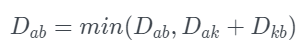

In [ ]:
INF = int(1e9)

# 노드, 간선 개수
n, m = map(int, input().split())
# 2차원 리스트(그래프), INF로 초기화
graph = [[INF] for i in range(n+1)]

# 자기 자신으로 가는 비용 - 0으로 초기화
for i in range(1, n+1):
  graph[i][i] = 0

# 각 간선에 대한 정보를 입력 및 초기화
for _ in range(m):
  a, b, c = map(int, input().spilist)
  graph[a][b] = c

# 점화식에 따라 알고리즘 수행
for k in range(1, n+1):
	for a in range(1, n+1):
		for b in range(1, n+1):
			graph[a][b] = min(graph[a][b], graph[a][k] + graph[k][b])
   
# 수행된 결과를 출력
for a in range(1, n+1):
	for b in range(1, n+1):
		# 도달할 수 없는 경우, 무한으로 출력
		if graph[a][b] == INF:
			print("INFINITY")
		else:
			print(graph[a][b], end = ' ')
	print()

# **Bellman-Ford**

다익스트라 알고리즘은 간선이 음수인 경우 음수 사이클에 빠질 수 있기 때문에 사용할 수 없다. 벨만포드 알고리즘을 사용하면 음수 사이클을 찾을 수 있다.

기본적인 개념은 모든 엣지를 거치면서 최단거리를 찾는것. 모든 노드에 대해 작업이 진행되며, 시간복잡도 = O(VE)[V= 노드의 개수, E= 엣지의 개수]

1. 출발 노드 설정
2. 최단거리 테이블 출발노드 = 0, 나머지 INF 로 초기화
3. 모든 E를 확인하며 테이블 값보다 (현재 노드 최단거리 + 현재 노드에서 해당 노드로 가는 거리)가 작다면 테이블을 갱신하는것을 V-1번 반복
4. 음수 사이클을 확인하기 위해서 3의 과정을 한번 만 더 수행 [이때 테이블이 갱신된다면 음수 사이클이 있는것]

다익스트라 알고리즘은 최적의 해를 찾는데 비해, 벨만 포드 알고리즘은 모든 간선을 모든 노드 개수만큼 반복하는 점에서 비효율적임. 하지만 음수 사이클을 처리할 수 있는 점이 특징

In [ ]:
import sys
input = sys.input.readline
INF = int(1e9)

# 노드 수, 간선 수 입력
n, m = map(int, input().split())
# 모든 간선에 대한 정보를 담는 리스트
edges = []
# 최단 거리 테이블을 모두 무한으로 초기화
dist = [INF] * (n+1)

# 그래프 생성
for _ in range(m):
  a, b, c = map(int, input().split()) # 노드, 인접 노드, 가중치
  edges.append(a, b, c)


def bf(start):
  #시작 노드에 대해 거리를 0으로 초기화
  dist[start] = 0 
  # 정점 수만큼 반복
  for i in range(n):
    # 매 반복 마다 모든 간선
    for j in range(m):
      cur = edges[j][0] # 현재 노드
      next_node = edges[j][1] # 다음 노드
      cost = edges[j][2] # 가중치
      # 현재 간선을 거려서 다른 노드로 이동하는 거리가 더 짧은 경우
      if dist[cur] != INF and dist[next_node] > dist[cur] + cost:
        dist[next_node] = dist[cur] + cost
        # n번째 라운드에서도 값이 갱신된다면 음수 순환이 존재
        if i == n - 1: # n-1번 이후 반복에도 값이 갱신되면 음수 순환 존재
         return True
  return False

start = 1
negative_cycle = bf(start)

if negative_cycle:
  print("negative cycle")
else:
  # 1번 노드를 제외한 다른 모든 노드로 가기 위한 최단 거리 출력
  for i in range(2, n+1):
    if dist[i] == INF: # 도달할 수 없는 경우 -1
      print("INF")
    else: # 도달할 수 있는 겨우 거리
      print(dist[i])